### Importar librerias

In [1]:
import pandas as pd 
from pivottablejs import pivot_ui
import matplotlib.pyplot as plt

### Cargar Dataset

In [2]:
df_events = pd.read_csv("Dataset/events.csv")
df_ginf = pd.read_csv("dataset/ginf.csv")
## Seleccionar solo las funciones que necesito. `id_odsp` sirve como un identificador único que se utilizará para
## unión de los 2 conjuntos de datos
df_ginf = df_ginf[['id_odsp' , 'date' , 'league' , 'season' , 'country' , 'ht']]

#unir los 2 dataset
df_events = df_events.merge(df_ginf, how='left')

df_edad_jugadores = pd.read_csv("Dataset/edad_jugadores.csv" , delimiter=",")

### Transformación de datos

In [7]:
def datos_jugador(nombre):
    edad = df_edad_jugadores[df_edad_jugadores['jugador'] == nombre]['edad']
    edad = [a for a in edad]
    fecha_nacimiento = df_edad_jugadores[df_edad_jugadores['jugador'] == nombre]['fecha_nacimiento']
    fecha_nacimiento = [a for a in fecha_nacimiento]
    
    goles = df_events[df_events['is_goal'] == 1][df_events['player'] == nombre]['is_goal'].sum()
    asistencia_gol = df_events[df_events['is_goal'] == 1][df_events['player2'] == 'julian schuster']['is_goal'].sum()
    amarilla = df_events[df_events['event_type'] == 4][df_events['player'] == nombre]['event_type'].sum()
    segunda_amarilla = df_events[df_events['event_type'] == 5][df_events['player'] == nombre]['event_type'].sum()
    tarjetas_rojas = df_events[df_events['event_type'] == 6][df_events['player'] == nombre]['event_type'].sum()
    
    
    users = {nombre: [edad[0] , fecha_nacimiento[0] ,  goles , asistencia_gol , amarilla , segunda_amarilla , tarjetas_rojas]}
    df = pd.DataFrame(users, index=['Edad ', 'Fecha de nacimiento' , 'Cantidad de goles' , 'Asistencia' , 'Primera amarilla' , 'Segunda amarilla' , 'Tarjeta roja'])

    return df

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
datos_jugador('felipe santana')

,felipe santana
Edad,36 años
Fecha de nacimiento,17 de marzo de 1986
Cantidad de goles,5
Asistencia,8
Primera amarilla,24
Segunda amarilla,0
Tarjeta roja,0


In [4]:
# penal
penal=df_events[(df_events["location"]==14) & (df_events['player'] == 'lionel messi')]

gol_penal=penal[penal["is_goal"]==1]
penal_pie_der=gol_penal[gol_penal["bodypart"]==1].shape[0]
penal_pie_izq=gol_penal[gol_penal["bodypart"]==2].shape[0]

gol_combinado=pd.DataFrame({"Pie derecho":penal_pie_der,"Pie izquierdo":penal_pie_izq},index=["Goles"])
gol_combinado

,Pie derecho,Pie izquierdo
Goles,0,30


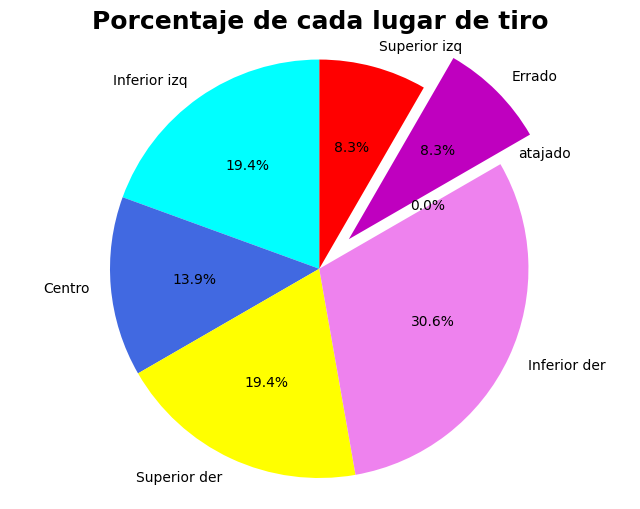

In [6]:
sup_izq=sum(penal["shot_place"]==12)
inf_izq=sum(penal["shot_place"]==3)
sup_der=sum(penal["shot_place"]==13)
inf_der=sum(penal["shot_place"]==4)
centro=sum(penal["shot_place"]==5)+sum(penal["shot_place"]==11)
atajado=sum(penal["shot_place"]==2)
errado=sum(penal["shot_place"]==1)+sum(penal["shot_place"]==6)+sum(penal["shot_place"]==7)+sum(penal["shot_place"]==8)+sum(penal["shot_place"]==9)+sum(penal["shot_place"]==10)

titulo=["Superior izq","Inferior izq","Centro","Superior der","Inferior der","atajado","Errado"]
pen=[sup_izq,inf_izq,centro,sup_der,inf_der,atajado,errado]
colores=["red", "aqua","royalblue","yellow","violet","yellow","m"]
plt.pie(pen,labels=titulo,colors=colores,autopct='%1.1f%%',startangle=60,explode=(0,0,0,0,0,0,0.2))
plt.axis('equal')
plt.title("Porcentaje de cada lugar de tiro",fontsize=18,fontweight="bold")
fig=plt.gcf()  
fig.set_size_inches(8,6)
plt.show()

In [24]:
def estadistica_total(jugador):
    player=df_events[df_events["player"]==jugador]
    goles=player[player["is_goal"]==1]
    errados=player[player["is_goal"]==0]
    
    sup_izq_pie_der=goles[goles["shot_place"]==12][goles["bodypart"]==1].shape[0]
    sup_izq_pie_izq=goles[goles["shot_place"]==12][goles["bodypart"]==2].shape[0]
    sup_izq_cabeza = goles[goles["shot_place"]==12][goles["bodypart"]==3].shape[0]
    
    inf_izq_pie_der=goles[goles["shot_place"]==3][goles["bodypart"]==1].shape[0]
    inf_izq_pie_izq=goles[goles["shot_place"]==3][goles["bodypart"]==2].shape[0]
    inf_izq_cabeza = goles[goles["shot_place"]==3][goles["bodypart"]==3].shape[0]   
    
    sup_der_pie_der=goles[goles["shot_place"]==13][goles["bodypart"]==1].shape[0]
    sup_der_pie_izq=goles[goles["shot_place"]==13][goles["bodypart"]==2].shape[0]
    sup_der_cabeza = goles[goles["shot_place"]==13][goles["bodypart"]==3].shape[0]
    
    inf_der_pie_der=goles[goles["shot_place"]==4][goles["bodypart"]==1].shape[0]
    inf_der_pie_izq=goles[goles["shot_place"]==4][goles["bodypart"]==2].shape[0]
    inf_der_cabeza = goles[goles["shot_place"]==4][goles["bodypart"]==3].shape[0]
    
    centro_pie_der=goles[goles["shot_place"]==5][goles["bodypart"]==1].shape[0]+goles[goles["shot_place"]==11][goles["bodypart"]==1].shape[0]
    centro_pie_izq=goles[goles["shot_place"]==5][goles["bodypart"]==2].shape[0]+goles[goles["shot_place"]==11][goles["bodypart"]==2].shape[0]
    centro_cabeza = goles[goles["shot_place"]==5][goles["bodypart"]==3].shape[0]
    
    sin_registro_pie_der=goles[goles["shot_place"].isnull()][goles["bodypart"]==1].shape[0]
    sin_registro_pie_izq=goles[goles["shot_place"].isnull()][goles["bodypart"]==2].shape[0]
    sin_registro_cabeza=goles[goles["shot_place"].isnull()][goles["bodypart"]==3].shape[0]

    errado_pie_der=errados[errados["bodypart"]==1].shape[0]
    errado_pie_izq=errados[errados["bodypart"]==2].shape[0]
    errado_cabeza=errados[errados["bodypart"]==3].shape[0]
    
    pie_der=pd.DataFrame({"Angulo sup. izq.":sup_izq_pie_der,"Angulo inf. izq.":inf_izq_pie_der,"Angulo sup. der.":sup_der_pie_der,"Angulo inf. der.":inf_der_pie_der,"Centro":centro_pie_der,"Sin registro":sin_registro_pie_der,"Errado":errado_pie_der},index=["Pie derecho"])
    pie_izq=pd.DataFrame({"Angulo sup. izq.":sup_izq_pie_izq,"Angulo inf. izq.":inf_izq_pie_izq,"Angulo sup. der.":sup_der_pie_izq,"Angulo inf. der.":inf_der_pie_izq,"Centro":centro_pie_izq,"Sin registro":sin_registro_pie_izq,"Errado":errado_pie_izq},index=["Pie izquierdo"])
    cabeza=pd.DataFrame({"Angulo sup. izq.":sup_izq_cabeza,"Angulo inf. izq.":inf_izq_cabeza,"Angulo sup. der.":sup_der_cabeza,"Angulo inf. der.":inf_der_cabeza,"Centro":centro_cabeza,"Sin registro":sin_registro_cabeza,"Errado":errado_cabeza},index=["Cabeza"])

    
    total=pie_der.append(pie_izq.append(cabeza))
    total=total[["Angulo sup. izq.","Angulo inf. izq.","Angulo sup. der.","Angulo inf. der.","Centro","Sin registro","Errado"]]
    return total

In [25]:
estadistica_total("lionel messi")

,Angulo sup. izq.,Angulo inf. izq.,Angulo sup. der.,Angulo inf. der.,Centro,Sin registro,Errado
Pie derecho,1,12,2,11,4,0,79
Pie izquierdo,13,52,22,43,32,5,585
Cabeza,0,6,1,1,0,0,45


In [16]:
# Obtención de datos de tarjetas amarillas

tarjeta_amarilla = df_events [df_events ['event_type'] == (4)]
segunda_tarjeta_amarilla= df_events [df_events ['event_type'] == (5)]
tarjeta_roja = df_events [df_events['event_type'] == (6)]

Text(0.5, 1.0, 'En que minuto se dan las tarjetas')

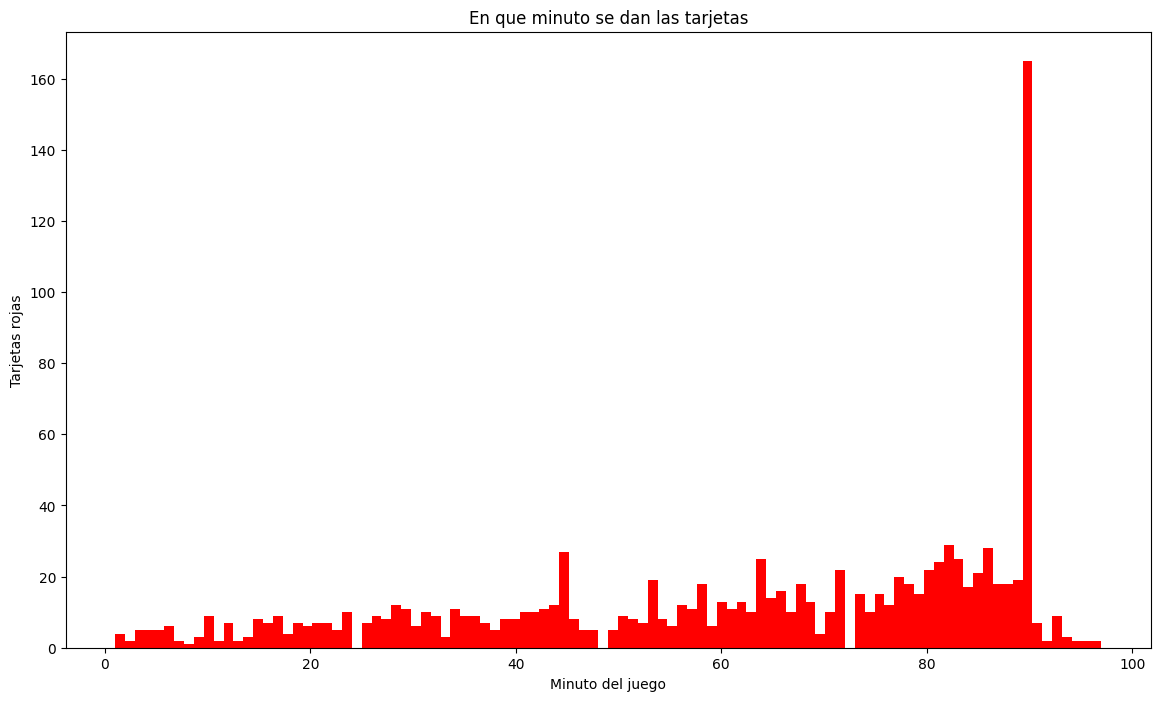

In [17]:
# Grafico de tarjeta amarilla x tiempo
fig = plt.figure(figsize=(14,8))
plt.hist(tarjeta_roja.time, 100, color="red")
plt.xlabel("Minuto del juego")
plt.ylabel("Tarjetas rojas")
plt.title("En que minuto se dan las tarjetas")

Text(0.5, 1.0, 'En que minuto se dan las tarjetas')

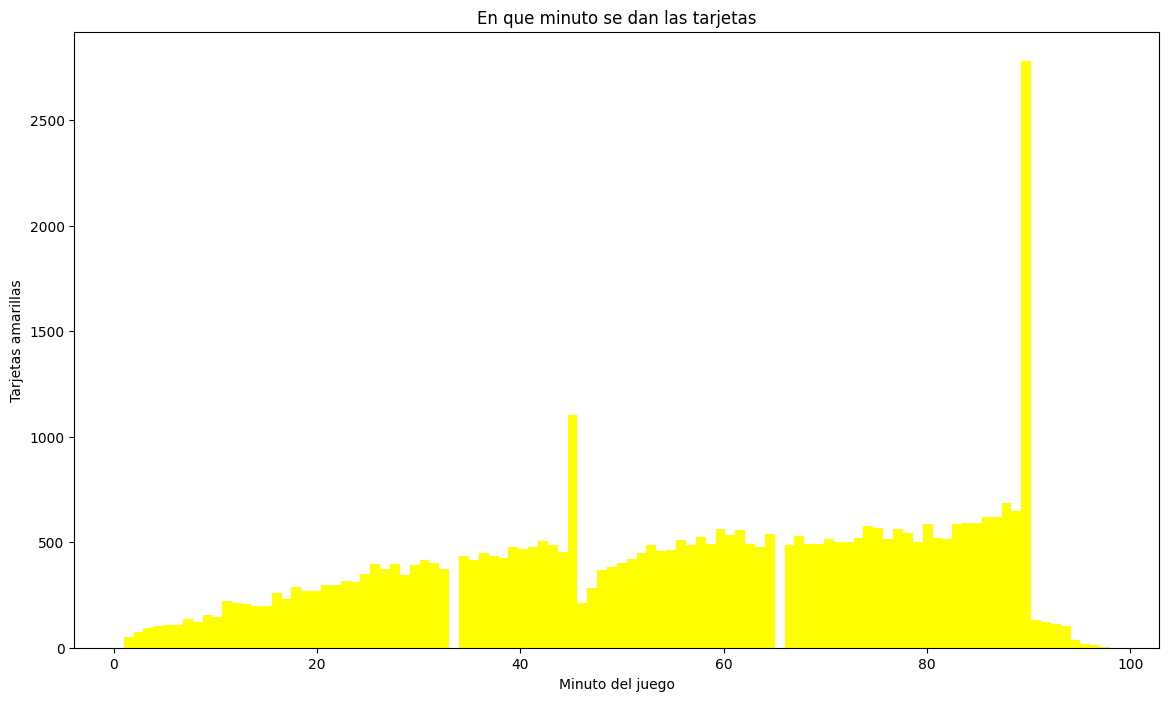

In [21]:
# Grafico de tarjeta amarilla x tiempo

fig2 = plt.figure(figsize=(14,8))
plt.hist(tarjeta_amarilla.time, 100, color="yellow")
plt.xlabel("Minuto del juego")
plt.ylabel("Tarjetas amarillas")
plt.title("En que minuto se dan las tarjetas")

Text(0.5, 1.0, 'En que minuto se dan las tarjetas')

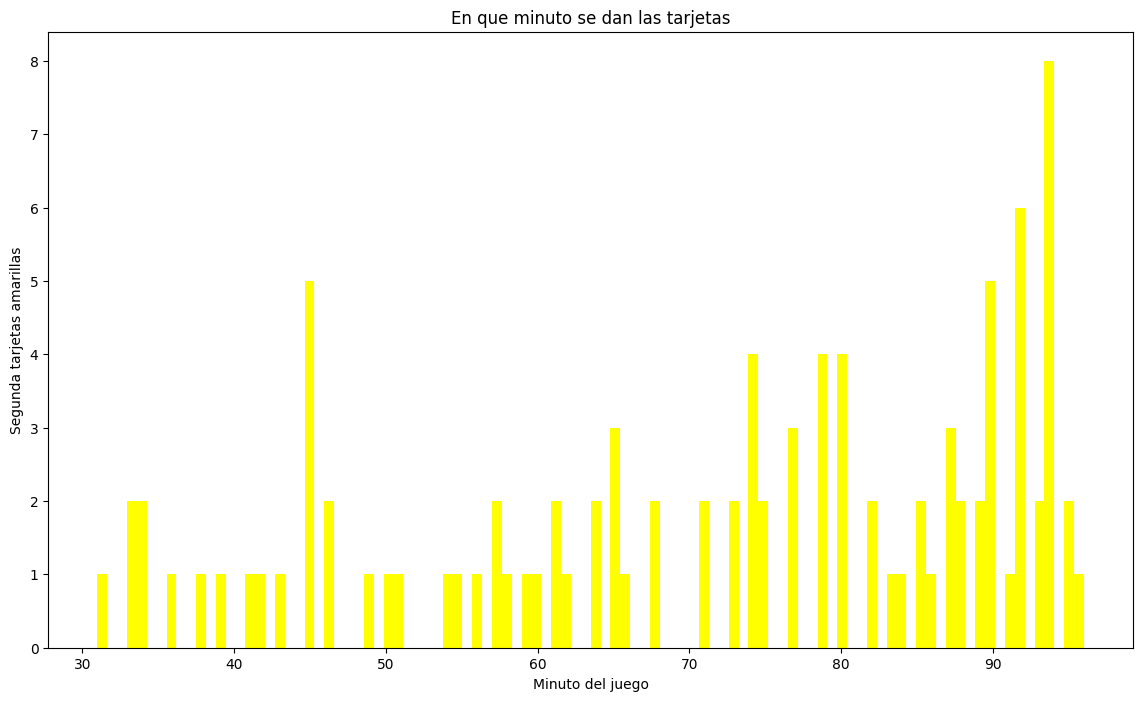

In [20]:
# Grafico de segunda tarjeta amarilla x tiempo

fig3 = plt.figure(figsize=(14,8))
plt.hist(segunda_tarjeta_amarilla.time, 100, color="yellow")
plt.xlabel("Minuto del juego")
plt.ylabel("Segunda tarjetas amarillas")
plt.title("En que minuto se dan las tarjetas")

Text(0.5, 1.0, 'Número de goles x tiempo')

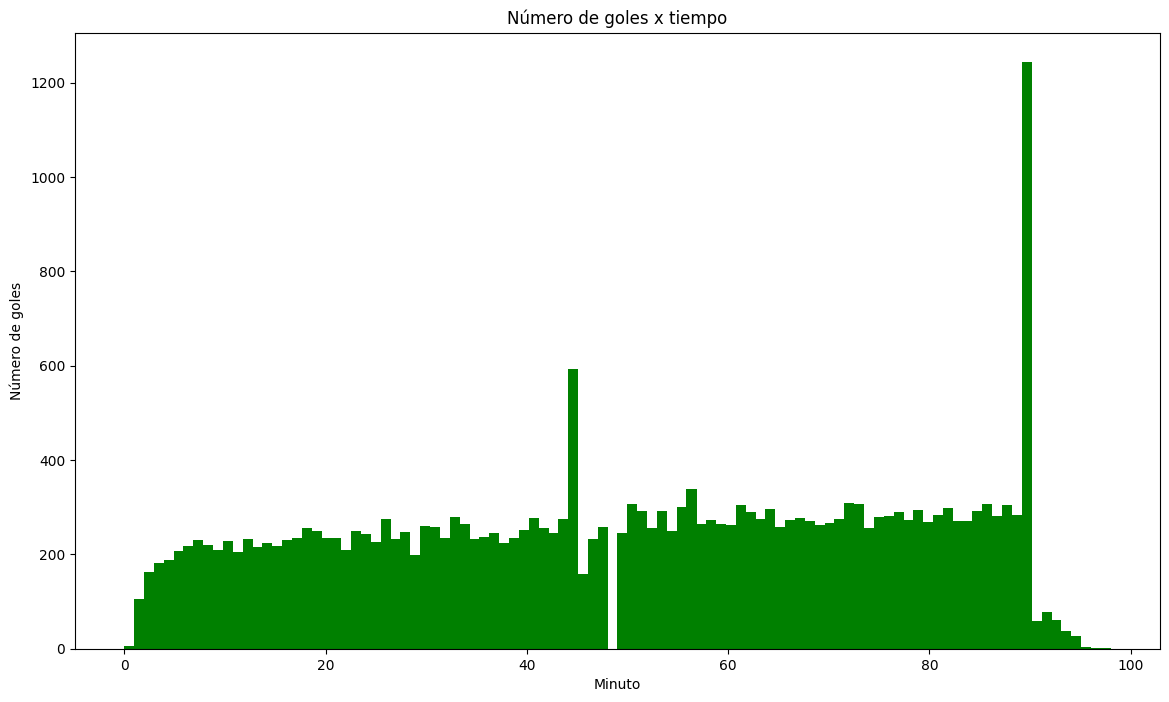

In [22]:
gol=df_events[df_events["is_goal"]==1]

fig4=plt.figure(figsize=(14,8))
plt.hist(gol.time,width=1,bins=100,color="green")   #100 -> 1 barra por minuto
plt.xlabel("Minuto")
plt.ylabel("Número de goles")
plt.title("Número de goles x tiempo")

### Datos curiosos

In [12]:
año = df_events["season"].unique()
for a in año:
    mas_goles = df_events[df_events["season"]==a][df_events["is_goal"] == 1].shape[0]

    print("En", a , "se metieron" , mas_goles ,"goles")

En 2012 se metieron 3670 goles
En 2013 se metieron 3931 goles
En 2014 se metieron 4767 goles
En 2015 se metieron 4652 goles
En 2016 se metieron 4748 goles
En 2017 se metieron 2678 goles


In [13]:
mas_tarjeta_rojas = df_events[df_events['event_type'] == (6)]["ht"].value_counts()
print(mas_tarjeta_rojas)

Bastia                        26
Montpellier                   22
Stade Rennes                  21
Nice                          21
Rayo Vallecano                20
                              ..
Cardiff                        1
Fulham                         1
Livorno                        1
TSV Eintracht Braunschweig     1
RB Leipzig                     1
Name: ht, Length: 139, dtype: int64


In [14]:
jugador_mas_goles = df_events[df_events['is_goal'] == 1][["player" , "season"]].value_counts()
print(jugador_mas_goles)

player             season
lionel messi       2012      50
                   2013      46
cristiano ronaldo  2015      44
                   2012      43
lionel messi       2015      40
                             ..
jonny              2015       1
jonny evans        2016       1
                   2017       1
jony               2017       1
zoumana camara     2015       1
Length: 7085, dtype: int64
